First few rows of the dataset:
   Order Date     Product     Category  Sales
0  2023-04-13     Monitor  Electronics   4823
1  2023-12-15  Smartphone  Electronics   4782
2  2023-09-28  Smartphone  Accessories   1748
3  2023-04-17      Laptop  Accessories   1545
4  2023-03-13  Smartphone  Electronics   4299

Missing values in each column:
Order Date    0
Product       0
Category      0
Sales         0
dtype: int64

Basic statistics of numerical columns:
             Sales
count   100.000000
mean   2626.490000
std    1469.088142
min     116.000000
25%    1272.750000
50%    2749.000000
75%    3909.000000
max    4993.000000

Top 5 products by sales:
Product
Smartphone    75944
Laptop        56217
Monitor       49551
Keyboard      44940
Tablet        35997
Name: Sales, dtype: int64


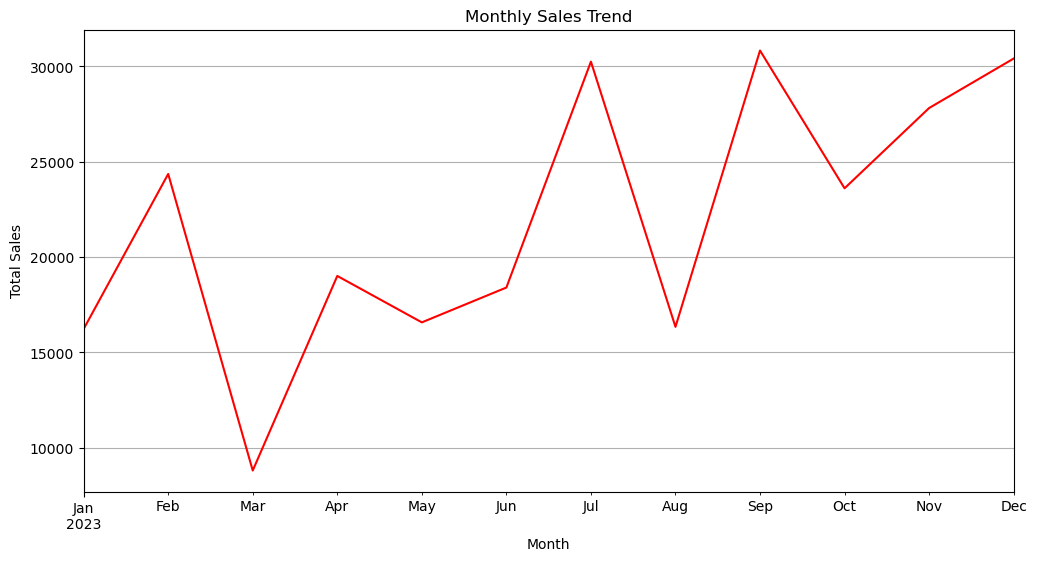

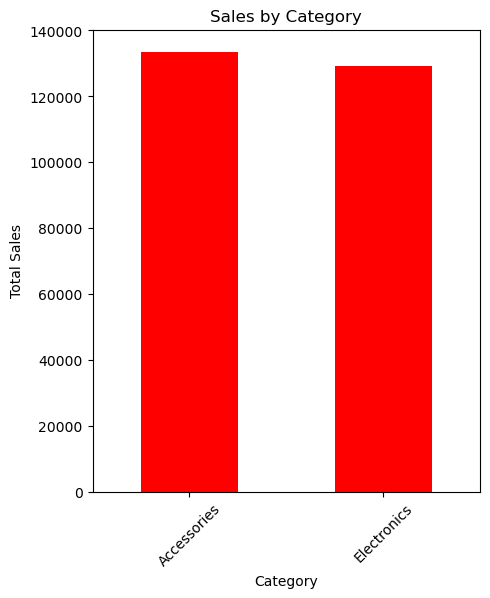

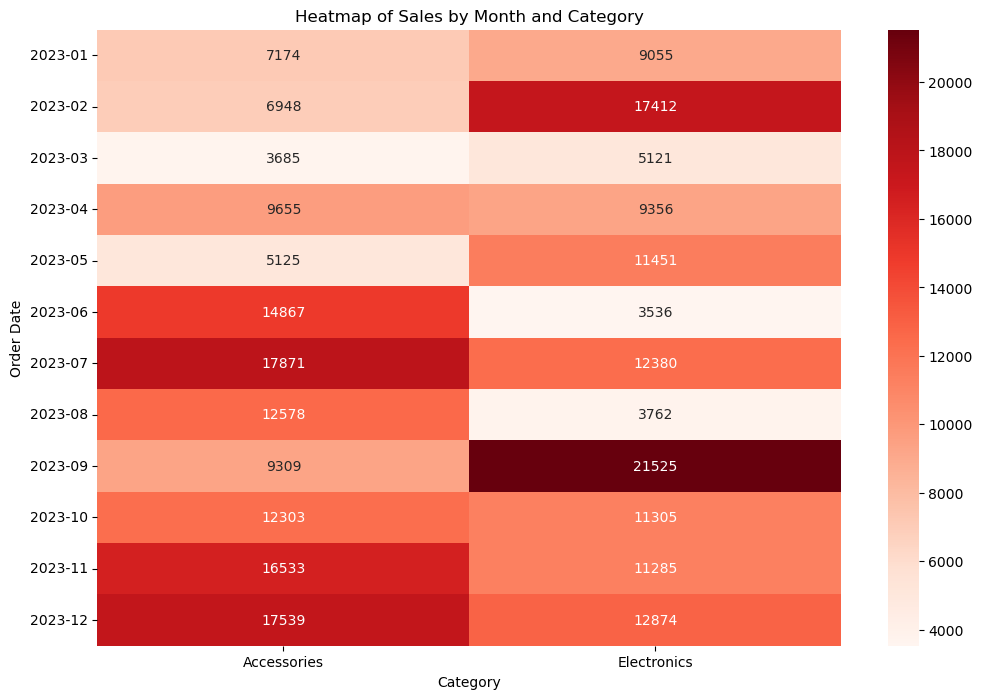

In [16]:
''' Sales Data Analysis Project 
Objective: Analyze a company's sales data to identify trends, best-selling products, and monthly performance.
Tools: Pandas, Matplotlib, Seaborn
Dataset: Public datasets '''


# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Sales Data
# Replace 'sales_data.csv' with your file path
data = pd.read_csv('sample_sales_data.csv')

# Display First Few Rows
print("First few rows of the dataset:")
print(data.head())

# Check for Missing Values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Basic Statistics 
# .describe() can be used to find basic statistics like mean, mode etc.

print("\nBasic statistics of numerical columns:")
print(data.describe())

# Top 5 Products by Sales 
#here we have grouped the product based on sales and then did the sum and sorted the vales in descending value and printed using head()

top_products = data.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 products by sales:")
print(top_products)

# Monthly Sales Trend
# Here we have taken monthely sales data into "monthely_sales" variable and will use this variable to make different figures like line, bar graph

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Sales'].sum()

# Plot Monthly Sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', color='Red')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Sales by Category
category_sales = data.groupby('Category')['Sales'].sum()
plt.figure(figsize=(5, 6))
category_sales.plot(kind='bar', color='Red')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Heatmap of Sales by Month and Category
sales_pivot = data.pivot_table(index=data['Order Date'].dt.to_period('M'), columns='Category', values='Sales', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot, annot=True, fmt='.0f', cmap='Reds')
plt.title('Heatmap of Sales by Month and Category')
plt.show()
